# Random Forest - Regression 

**Ensemble Learning**  
* Random Forest is an example.  
* Other versions such as gradient boosting.  
* Take multiple algorithms and combine to make more powerful.  

**Random Forest Intuition**  
1. Pick a random K data points from the Training set.  
2. Build a Decision Tree associated to these K data points.  
3. Choose number of trees you want - and repeat steps 1 and 2.  
4. For a new data point - make each of your N trees predict the value of Y for the data point in question and assign the new data point the average across all the predicted Y values.  

* Entropy and information gain.

**Regression Template**  
* Note the regressor syntax: need a dataframe of independents for x ; need a VECTOR of dependents.  
* As you increase the number of trees - you won't see a proportionate increase in steps. 
* Converges - to better placement of steps.  

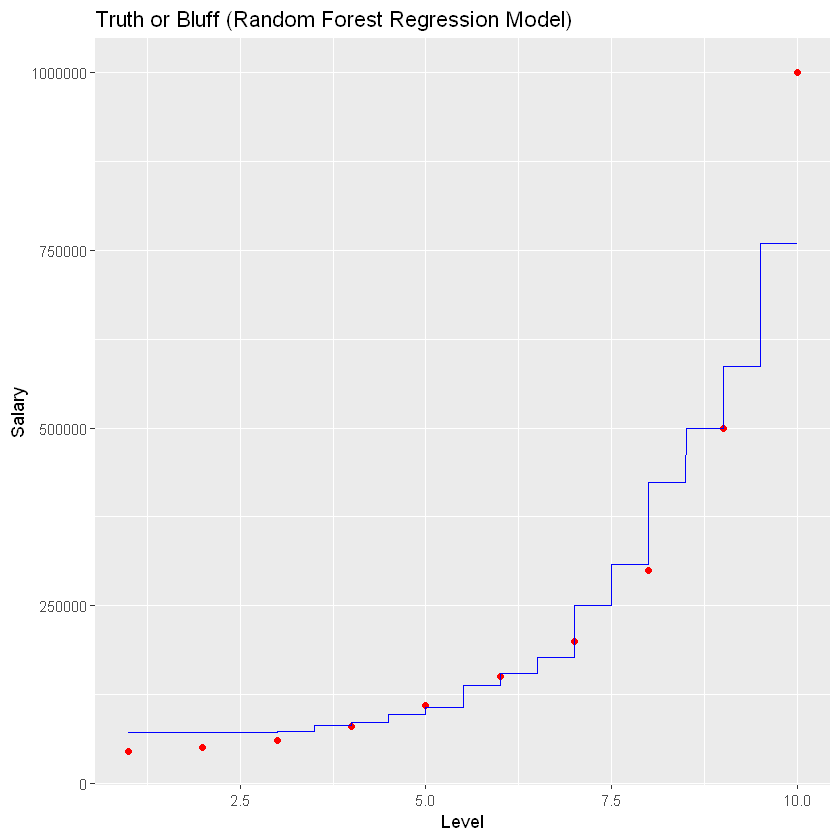

In [7]:
# Regression Template

# Importing the dataset
dataset = read.csv('Position_Salaries.csv')
dataset = dataset[2:3]

# Splitting the dataset into the Training set and Test set
# # install.packages('caTools')
# library(caTools)
# set.seed(123)
# split = sample.split(dataset$Salary, SplitRatio = 2/3)
# training_set = subset(dataset, split == TRUE)
# test_set = subset(dataset, split == FALSE)

# Feature Scaling
# training_set = scale(training_set)
# test_set = scale(test_set)

# Fitting the Regression Model to the dataset
library(randomForest)
regressor <- randomForest(x = dataset[1],
                          y = dataset$Salary,
                          ntree = 100)

# Predicting a new result
y_pred = predict(regressor, data.frame(Level = 6.5))


# Visualising the Regression Model results (for higher resolution and smoother curve)
# install.packages('ggplot2')
library(ggplot2)
x_grid = seq(min(dataset$Level), max(dataset$Level), 0.001)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(regressor, newdata = data.frame(Level = x_grid))),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Random Forest Regression Model)') +
  xlab('Level') +
  ylab('Salary')